# SM2 Public Dataset – Demo Notebook

This notebook works in **Google Colab** and in **local Jupyter**.

If you run locally, make sure you have these packages installed (Colab already has them):

```bash
pip install gdown pandas matplotlib pyarrow fastparquet
```


In [ ]:
# Optional (for local Jupyter): install dependencies
try:
    import gdown, pyarrow  # noqa
except Exception:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install",
                           "gdown", "pandas", "matplotlib", "pyarrow", "fastparquet"])

Downloading...
From: https://drive.google.com/uc?id=1gLPWgUGtRb371Gpv5O8t5j95lthNjELg
To: /content/sm2_public_dataset.parquet
100%|██████████| 1.27M/1.27M [00:00<00:00, 131MB/s]


Shape: (647566, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647566 entries, 0 to 647565
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   time         647566 non-null  datetime64[ns, UTC]
 1   location     647566 non-null  object             
 2   source       647566 non-null  object             
 3   measurement  647566 non-null  object             
 4   data_key     647566 non-null  object             
 5   data_value   647566 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 29.6+ MB
None
Time range: 2023-11-30 13:00:00+00:00 → 2025-08-29 09:19:00+00:00

Distinct data_key:
['temp_ambient' 'temp_fresh' 'temp_indoor' 'temp_intake' 'temp_waste'
 'humidity_indoor']

Top 20 combinations by row count:
   location source      data_key   rows
69   sm2_06  Atrea   temp_indoor  15136
65   sm2_05  Atrea   temp_intake  15136
66   sm2_05  Atrea

/tmp/ipython-input-2041359784.py:36: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df["month"] = df["time"].dt.to_period("M")


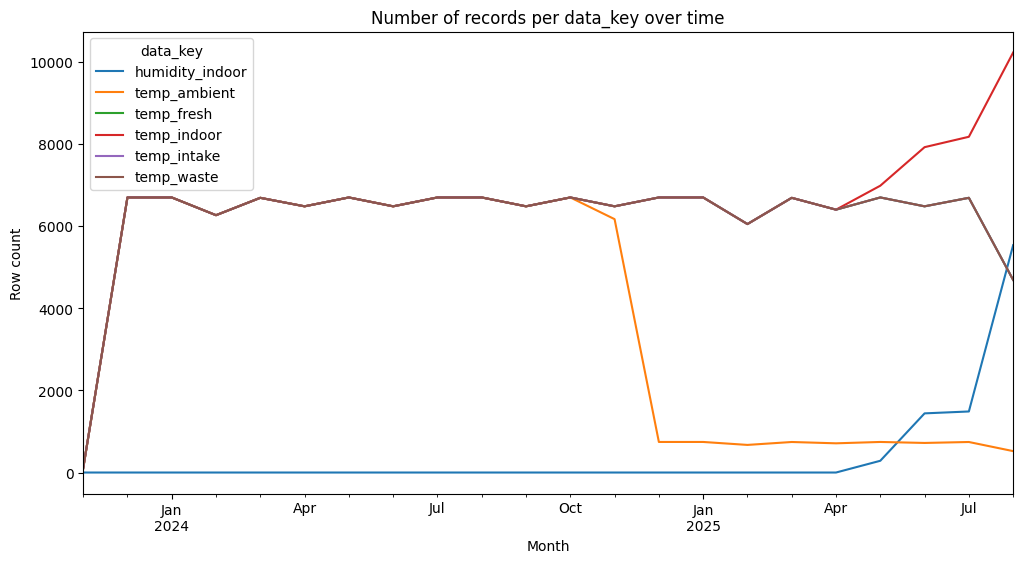

In [2]:
import gdown
import pandas as pd
import matplotlib.pyplot as plt

# Google Drive ID for the Parquet file
file_id = "1gLPWgUGtRb371Gpv5O8t5j95lthNjELg"
url = f"https://drive.google.com/uc?id={file_id}"
output = "sm2_public_dataset.parquet"

# Download
gdown.download(url, output, quiet=False)

# Load
df = pd.read_parquet(output)

# Types & basic info
print("Shape:", df.shape)
print(df.info())
df["time"] = pd.to_datetime(df["time"], utc=True)
print("Time range:", df["time"].min(), "→", df["time"].max())

# Distinct metrics
print("\nDistinct data_key:")
print(df["data_key"].unique())

# Combo overview
agg_table = (
    df.groupby(["location", "source", "data_key"]).size()
      .reset_index(name="rows")
      .sort_values("rows", ascending=False)
)
print("\nTop 20 combinations by row count:")
print(agg_table.head(20))

# Monthly trend by data_key
df["month"] = df["time"].dt.to_period("M")
trend_table = (
    df.groupby(["month", "data_key"]).size()
      .reset_index(name="rows")
      .pivot(index="month", columns="data_key", values="rows")
      .fillna(0)
      .sort_index()
)
print("\nMonthly distribution by data_key:")
print(trend_table.head(12))

# Plot
trend_table.plot(kind="line", figsize=(12,6))
plt.title("Number of records per data_key over time")
plt.ylabel("Row count")
plt.xlabel("Month")
plt.legend(title="data_key")
plt.show()